In [2]:
# best 3 solutions based on EXP1 in turns of f1 micro is:
# XGBcls: RoadNet+Social type, 0.6561797753
# BAGcls: RoadNet+Social type, 0.6539325843
# RFreg: RoadNet+Social total, 0.6494382022
# with ~2014, min-max, no feature selection

In [3]:
from src.experiment_based_function import SEEDS
import pandas as pd
%matplotlib inline
import os
import glob

In [4]:
def get_exp5_result(eval_or_grid='eval'):
    res = []
    for directoy in glob.glob('experiment_1001/exp5_recon/*'):
#         print(directoy)
        df = pd.read_csv('%s/%s_res.csv' % (directoy, eval_or_grid), index_col=0)
        frac, sample_seed = directoy.replace('experiment_1001/exp5_recon/', '').split('#')
        df['frac'] = frac
        df['sample_seed'] = sample_seed
        res.append(df)
    return pd.concat(res, ignore_index=0)

In [5]:
eval_res = get_exp5_result()
eval_res = eval_res[eval_res.model_name!='GBDcls']

In [6]:
cols = ['frac', 'sample_seed', 'upsample', 'ftr_combo_name', 'model_name', 'feature_selection','test_f1_weighted', 'test_f1_macro', 'test_f1_micro']

In [7]:
eval_res.columns

Index(['#ftr_all', '#ftr_keep', '#test_sample', '#train_sample',
       'feature_selection', 'ftr_combo_name', 'model_name', 'test_acc',
       'test_f1_macro', 'test_f1_micro', 'test_f1_weighted', 'test_mse',
       'test_n_classes', 'train_acc', 'train_f1_macro', 'train_f1_micro',
       'train_f1_weighted', 'train_mse', 'train_n_classes', 'upsample',
       'y_dist', 'y_dist_up', 'frac', 'sample_seed'],
      dtype='object')

In [8]:
print('train', eval_res.train_n_classes.value_counts().to_dict())
print('test', eval_res.test_n_classes.value_counts().to_dict())

print('train', 'test')
print(eval_res.apply(lambda x: (x.train_n_classes, x.test_n_classes), axis=1).value_counts())

train {5: 640}
test {5: 640}
train test
(5, 5)    640
dtype: int64


In [9]:
f1_choices = ['test_f1_macro', 'test_f1_micro']

In [10]:
keys = ['frac', 'ftr_combo_name', 'model_name']

In [11]:
info = eval_res.groupby(['frac','upsample']).mean()[['#test_sample', '#train_sample','test_n_classes','train_n_classes', ]]

In [12]:
means = eval_res.groupby(keys).mean()[f1_choices]
stds = eval_res.groupby(keys).std()[f1_choices]
means = means.reset_index().merge(info.reset_index(), how='left').set_index(keys)

In [13]:
def get_paper_table(means, f1_type, index_cols, column_col='ftr_combo_name'):
    cols_name_convert = {'RoadNet': '1RoadNet', 'RoadNet+Segment_NO_TOTAL_~2014': '5RoadNet+Segment type',
     'RoadNet+Segment_TOTAL_~2014': '4RoadNet+Segment total', 'Segment_NO_TOTAL_~2014': '3Segment type',
     'Segment_TOTAL_~2014': '2Segment total'}
    means_for_pivot = means.reset_index()
    means_for_pivot['ftr_combo_name'] = means_for_pivot['ftr_combo_name'].apply(lambda x: cols_name_convert[x])
    means_for_pivot['key'] = means_for_pivot.apply(lambda x: tuple([x[col] for col in index_cols]), axis=1)
    table = means_for_pivot.reset_index().pivot(index='key', columns=column_col, values=f1_type)
    table.index = pd.MultiIndex.from_tuples(table.index, names=index_cols)    
    return table

In [14]:
f1_type = f1_choices[1]
print(f1_type)
index_cols = [k for k in keys if k!='frac']
# ['test_n_classes','train_n_classes']+
table = get_paper_table(means, f1_type, index_cols, column_col='frac')

test_f1_micro


In [15]:
%matplotlib inline

In [19]:
table[table['90']>0.9]
table.to_csv('deliverables/experiment_1001/EXP5 reconstruct.csv')

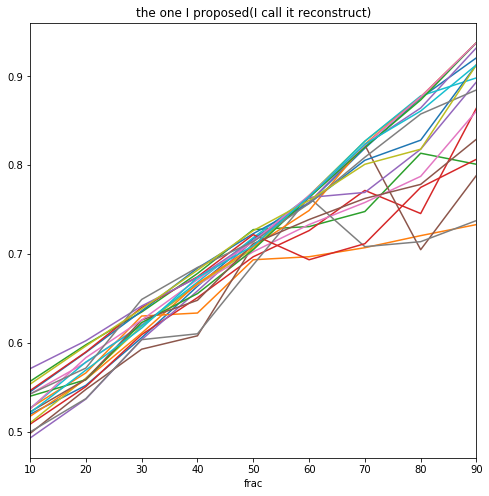

In [18]:
table.T.plot(legend=False, figsize=(8,8), title='the one I proposed(I call it reconstruct)')